<div class="alert alert-danger"> 
<font size="+2">   
Credit EDA (Exploratory Data Analysis)
</font>
</div>

<div class="alert alert-success">


Business Understanding :

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. 

<br>
    
Objective : 

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  
    

The company can utilise this knowledge for its portfolio and risk assessment.
    
 

<br>    
</div>



<div class="alert alert-warning">


There are 2 dataset and 1 Column details given which are explained below: 
    

<br>


&#10148; 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties. </br>

<br>

&#10148; 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.</br>

<br> 

&#10148; 'columns_description.csv' is data dictionary which describes the meaning of the variables. </br>

<br>

</div>

<div class="alert alert-info"> Importing necessary libraries
</div>

In [1]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action="ignore")

<div class="alert alert-info"> 
    
Importing file which contains all the information of the client at the time of application. <br>
    
The data is about whether a client has payment difficulties.
    
</div>

In [2]:
app = pd.read_csv("application_data.csv")

<div class="alert alert-info"> 
    
Importing file which contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.
    
</div>


In [3]:
pre = pd.read_csv("previous_application.csv")

<div class="alert alert-info"> 
    
Viewing top 5 rows of both database

</div>


In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info"> 
    
Viewing Names of Columns in Application data - Database

</div>

In [6]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

<div class="alert alert-info"> Number of Rows and Columns in both data set </div>

In [7]:
print("No. of Rows & Columns in App Data :", app.shape)

No. of Rows & Columns in App Data : (307511, 122)


In [8]:
print("No. of Rows & Columns in Prev Data :", pre.shape)

No. of Rows & Columns in Prev Data : (1670214, 37)


<div class="alert alert-info"> :: Dealing With First dataset - Application data :: </div>

<div class="alert alert-info">  Checking the info(details) of dataset</div>

In [9]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<div class="alert alert-info">  Describing Dataset to get some info </div>

In [10]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<div class="alert alert-info"> Number of null values in data set</div>

In [11]:
y = round(100*app.isnull().sum()/len(app),2)

x = y.sort_values(ascending=False)

x

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

<div class="alert alert-info"> 

Checking the percentage of null values in columns of Application database <br>
Checking the percentage of null values greater than 40%

</div>

In [12]:
null_app = (app.isnull().sum() / len(app)) * 100
major_missing = null_app.loc[null_app >= 40]
print(major_missing)

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

<div class="alert alert-info"> Checking number of columns in major_missing (greater than 40%) </div>

In [13]:
len(major_missing)

49

<div class="alert alert-info"> Dropping Columns with more than 40% null values and storing new dataset in "app_up"</div>

In [14]:
app_up = app.drop(columns=major_missing.index)

<div class="alert alert-info"> 

Checking the shape and cloumns of new dataset after dropping

</div>

In [15]:
app_up.shape

(307511, 73)

In [16]:
app_up.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [17]:
app_up.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-info"> Finding correlation with Target column </div>

In [18]:
app_up.corrwith(app_up['TARGET'])

SK_ID_CURR                   -0.002108
TARGET                        1.000000
CNT_CHILDREN                  0.019187
AMT_INCOME_TOTAL             -0.003982
AMT_CREDIT                   -0.030369
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
Length: 61, dtype: float64

- Correlation -> Strength of relationship
- Range -1 to +1
- 0 to 1 -> Positive Relationship (directly proportional)
- -1 to 0 -> Negative Relationship (Inversely proportional)
- Closer to 0 but positive means weak positive relationship
- Closer to 0 but negative means weak negative relationship
- Closer to 1 means strong positive relationship
- Closer to -1 means strong negative relationship
- If it is 0 means no relationship

<div class="alert alert-info"> Manually creating list of unwanted columns </div>

In [19]:
unwanted_cols=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

<div class="alert alert-info"> Dropping the selected unwanted columns above and checking first 5 rows, shape, and other details of updated dataset </div>

In [20]:
app_up.drop(columns=unwanted_cols,inplace=True)

In [21]:
app_up.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
app_up.shape

(307511, 42)

In [23]:
app_up.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [24]:
app_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

<div class="alert alert-info"> Finding unique values in dataset </div>

In [25]:
app_up.nunique().sort_values(ascending=True)

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

<div class="alert alert-info"> SK_ID_CURR is int data type, but it holds id number of customers, and this variable cannot be manipulated,</br> so we will convert it to object datatype </div>

In [26]:
app_up['SK_ID_CURR'] = app_up['SK_ID_CURR'].astype('object')

<div class="alert alert-info"> Creating list of category columns, and converting there datatypes to category </div>

In [27]:
categ_cols=['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE']
for i in categ_cols:
    app_up[i]=app_up[i].astype('category')
    

<div class="alert alert-info"> Chekcing datatype after conversion </div>

In [28]:
app_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [29]:
app_up.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,5.143927e-01,0.510853
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,1.910602e-01,0.194844
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.924574e-01,0.370650
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.636171e-01,0.669057
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010


<div class="alert alert-info"> We found that (DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH)
are in negative </div>

In [30]:
app_up[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


<div class="alert alert-info"> Lets change the negative to positive values, and change the days to years </div>

In [31]:
days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
app_up[days_col] = app_up[days_col].abs()
app_up[days_col] = app_up[days_col]/365
app_up[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


<div class="alert alert-info"> Lets change the columns names</div>

In [32]:

app_up.rename(columns={'DAYS_BIRTH':'Years_Birth','DAYS_EMPLOYED':'Years_Employed','DAYS_REGISTRATION':'Years_Registration','DAYS_ID_PUBLISH':'Years_Id_Publish'},inplace=True)

<div class="alert alert-info"> Checking Dtype's & Column Names after modification </div>

In [33]:
app_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

<div class="alert alert-info"> Finding Value's of CODE_GENDER column </div>

In [34]:
app_up['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<div class="alert alert-info"> Finding mode of CODE_GENDER column </div>

In [35]:
mode = app_up['CODE_GENDER'].mode().values[0]
print(mode)

F


<div class="alert alert-info"> impute XNA with mode of gender column </div>

In [36]:

app_up.loc[app_up['CODE_GENDER']=='XNA','CODE_GENDER'] = 'F'
app_up['CODE_GENDER'].value_counts()

F      202452
M      105059
XNA         0
Name: CODE_GENDER, dtype: int64

<div class="alert alert-info"> Lets check the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables </div>

In [37]:
app_up[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


<div class="alert alert-info"> Creating Bins,ranges to create new columns Income range and Credit range </div>

In [38]:
# its hard to determine the type of customer based on these are continous

bins=[0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
app_up['Income_Range'] = pd.cut(app_up['AMT_INCOME_TOTAL'],bins,labels=ranges)
app_up['Credit_Range'] = pd.cut(app_up['AMT_CREDIT'],bins,labels=ranges)

<div class="alert alert-info"> Checking New columns created </div>

In [39]:
app_up.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000


<div class="alert alert-info"> plotting counter plot on amount_credit </div>

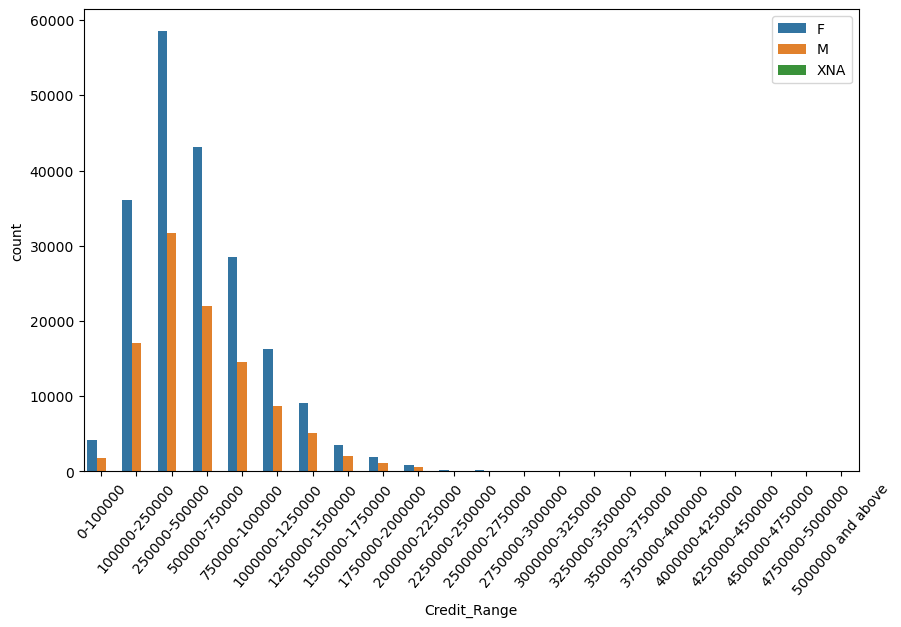

In [40]:
plt.figure(figsize=[10,6])
sns.countplot(data=app_up, x='Credit_Range',hue='CODE_GENDER')
plt.xticks(rotation=50)
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-info"> Checking outliers with desc function </div>

In [41]:
app_up.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,Years_Birth,Years_Employed,Years_Registration,Years_Id_Publish,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936973,185.547239,13.660604,8.203294,5.143927e-01,0.510853
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.956133,382.037676,9.651743,4.135481,1.910602e-01,0.194844
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,3.924574e-01,0.370650
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,5.659614e-01,0.535276
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,6.636171e-01,0.669057
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,8.549997e-01,0.896010


<div class="alert alert-info"> Few variables have outliers as we seen in describe()
<br>one variable 'CNT_CHILDREN' have high values as '19',in general case,it doesnt possible to have 19 children.,
<br>lets make box plot  </div>


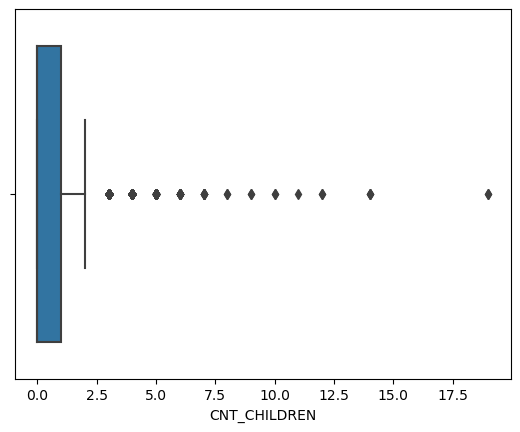

In [42]:

sns.boxplot(app_up['CNT_CHILDREN'])
plt.show()

<div class="alert alert-info"> lets make box plot on 'AMT_INCOME_TOTAL'
we can clearly seen that few outliers in variable 'AMT_INCOME_TOTAL' </div>

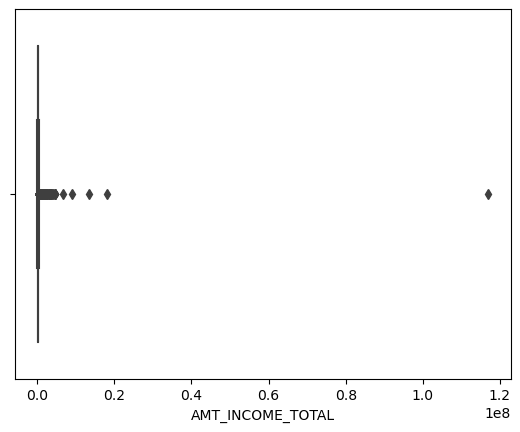

In [43]:
sns.boxplot(app_up['AMT_INCOME_TOTAL'])
plt.show()

<div class="alert alert-info"> Lets see the outlier in Maximum income </div>

In [44]:
app_up[app_up['AMT_INCOME_TOTAL'] == app_up['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000000 and above,500000-750000


<div class="alert alert-info"> Lets see outlier in CNT_CHILDREN </div>

In [45]:
app_up[app_up['CNT_CHILDREN'] == app_up['CNT_CHILDREN'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,100000-250000,250000-500000
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,100000-250000


<div class="alert alert-info"> lets see the outliers in ,variable 'AMT_CREDIT' </div>

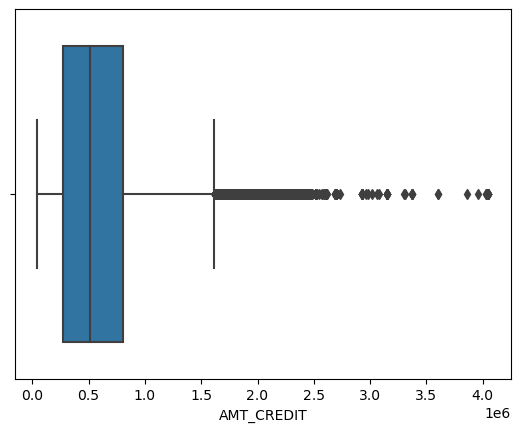

In [46]:
sns.boxplot(app_up['AMT_CREDIT'])

plt.show()

<div class="alert alert-info"> lets see what  rows have more AMT_CREDIT than AMT_INCOME_TOTAL </div>

In [47]:
app_up[app_up['AMT_CREDIT'] > app_up['AMT_INCOME_TOTAL']]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,250000-500000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,100000-250000,500000-750000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,250000-500000


<div class="alert alert-info"> lets check which are more than 3.5*1e6 ,as we seen in boxplot </div>

In [48]:


app_up[app_up['AMT_CREDIT'] > 3.5*1e6]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,197230.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,500000-750000,3750000-4000000
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
53936,162494,0,Cash loans,M,Y,N,0,900450.0,3600000.0,91008.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,750000-1000000,3500000-3750000
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,4000000-4250000
104577,221360,0,Cash loans,M,Y,N,0,468000.0,3600000.0,91138.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,3500000-3750000
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,3.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,750000-1000000,4000000-4250000
119380,238431,0,Cash loans,F,Y,N,0,292050.0,3860019.0,97578.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,250000-500000,3750000-4000000
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000-750000,4000000-4250000


In [49]:
app_up.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'Years_Birth',
       'Years_Employed', 'Years_Registration', 'Years_Id_Publish',
       'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_

<div class="alert alert-info"> We have seen that variable 'YEARS_EMPLOYED' have outlier is about 1000 years,
In general case, it cant possible </div>

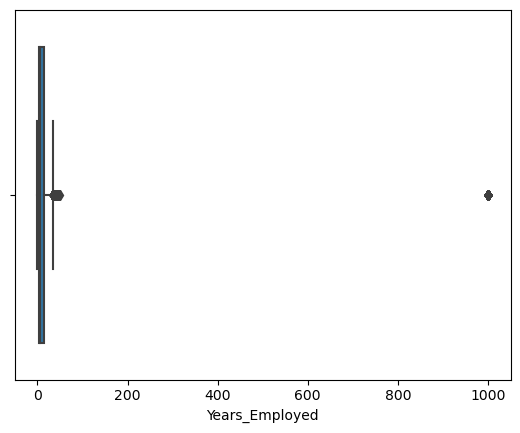

In [50]:
sns.boxplot(app_up['Years_Employed'])
plt.show()

<div class="alert alert-warning">
    
We will divide the data set into parts based on target variable values
lets create two data frame target=0 and target=1
</div>

<div class="alert alert-info"> Lets check the distribution of data on variable target values </div>

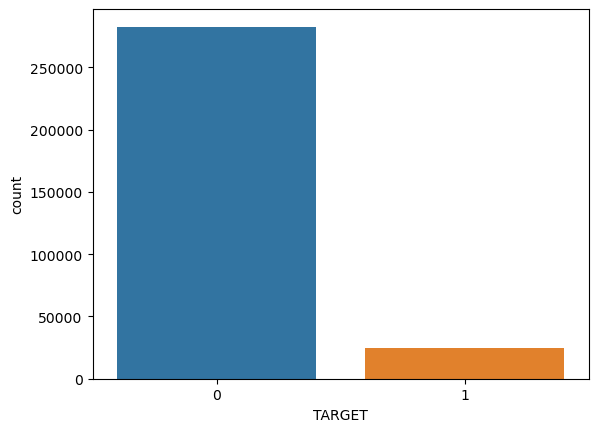

In [51]:
sns.countplot(app_up['TARGET'])
plt.show()

<div class="alert alert-info"> count number of values having target 0 & 1 </div>

In [52]:
app_up['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<div class="alert alert-info"> Normalise the value </div>

In [53]:
app_up['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

<div class="alert alert-info"> Create New data frame for Target=0 </div>

In [54]:

target_0=app_up[app_up['TARGET']==0]

<div class="alert alert-info"> View data of head & shape of target_0 </div>

In [55]:

target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0-100000,250000-500000


In [56]:
target_0.shape

(282686, 44)

<div class="alert alert-info"> Create new dataframe of Target = 1 & checking its head and shape </div>

In [57]:

target_1=app_up[app_up['TARGET']==1]

In [58]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Range,Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000


In [59]:
target_1.shape

(24825, 44)

<div class="alert alert-info"> Lets check the imbalance of two new data frames </div>

In [60]:
ratio = target_0.shape[0]/target_1.shape[0]
ratio

11.387150050352467

<div class="alert alert-info">
    
We will now analyze the correlation between different variables in the two data frames, where the target is set to 0 and 1. To visualize the correlation, we will use a heatmap.
</div>

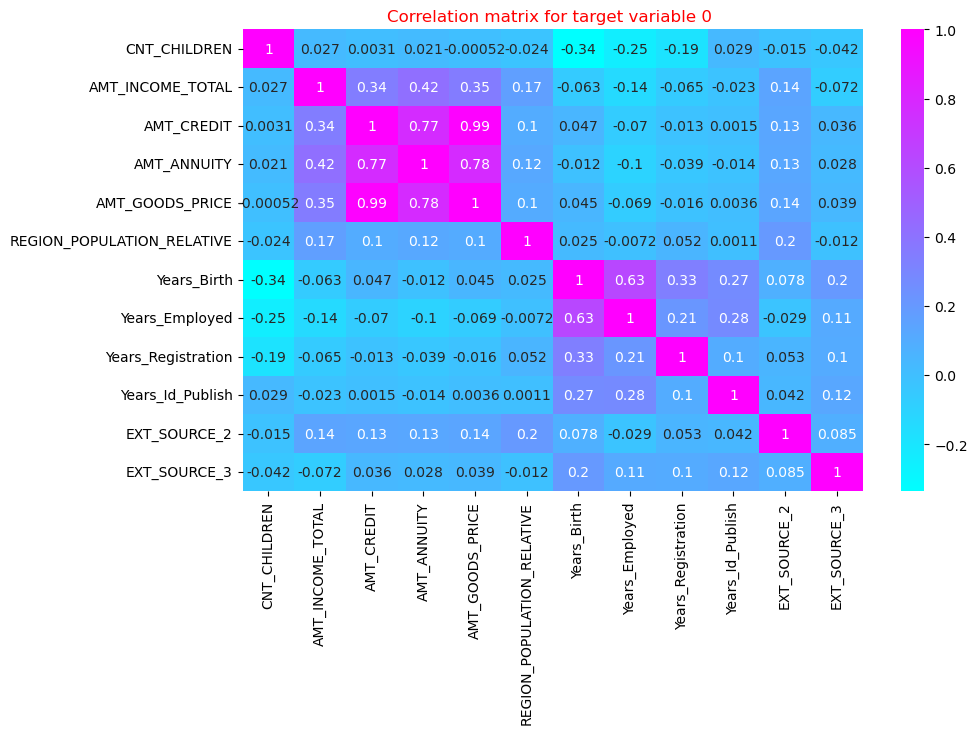

In [61]:

plt.figure(figsize=(10,6))
sns.heatmap(target_0.corr(),cmap='cool',annot=True)
plt.title('Correlation matrix for target variable 0 ',color='red')
plt.show()

- Correlation -> Strength of relationship
- Range -1 to +1
- 0 to 1 -> Positive Relationship (directly proportional)
- -1 to 0 -> Negative Relationship (Inversely proportional)
- Closer to 0 but positive means weak positive relationship
- Closer to 0 but negative means weak negative relationship
- Closer to 1 means strong positive relationship
- Closer to -1 means strong negative relationship
- If it is 0 means no relationship

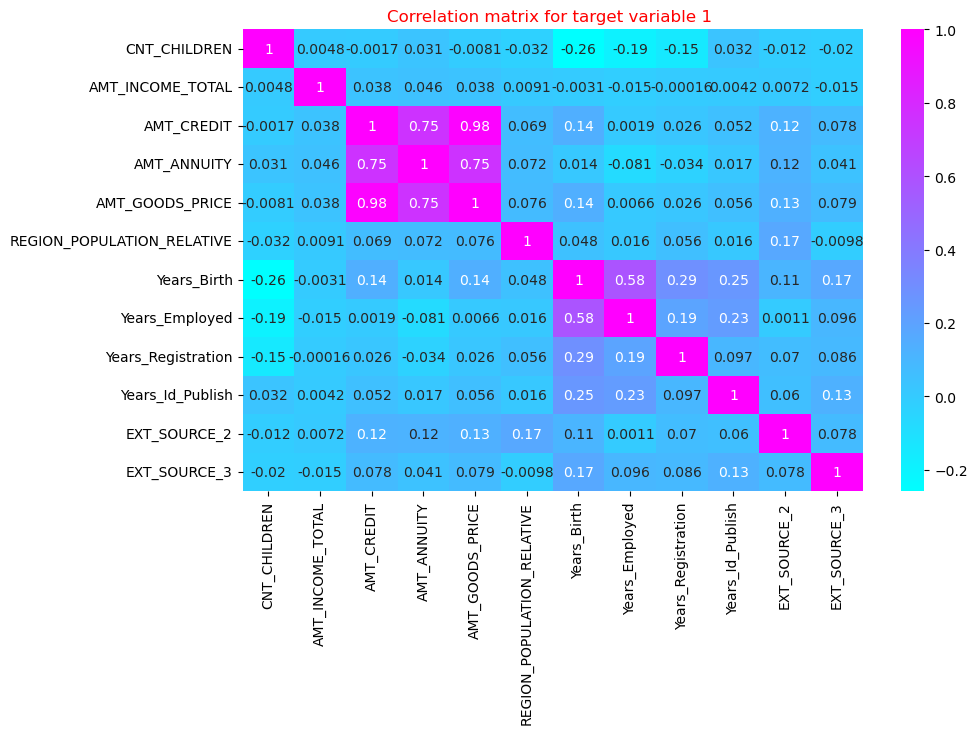

In [62]:

plt.figure(figsize=(10,6))
sns.heatmap(target_1.corr(),cmap='cool',annot=True)
plt.title('Correlation matrix for target variable 1 ',color='red')
plt.show()

- Correlation -> Strength of relationship
- Range -1 to +1
- 0 to 1 -> Positive Relationship (directly proportional)
- -1 to 0 -> Negative Relationship (Inversely proportional)
- Closer to 0 but positive means weak positive relationship
- Closer to 0 but negative means weak negative relationship
- Closer to 1 means strong positive relationship
- Closer to -1 means strong negative relationship
- If it is 0 means no relationship

<div class="alert alert-info"> Through this correalation, using heatmap.
we can conclude that correaltions are almost same. </div>
 
    

###### Univariate Analysis

In [63]:
#lets do univariate analysis for numerics
#lets see the info 
app_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

<div class="alert alert-info"> univariate analysis for 'Years_Birth' </div>

In [64]:
target_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'Years_Birth',
       'Years_Employed', 'Years_Registration', 'Years_Id_Publish',
       'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_

<div class="alert alert-info"> Lets do univariate analysis on variable ''Years_Birth'' </div>


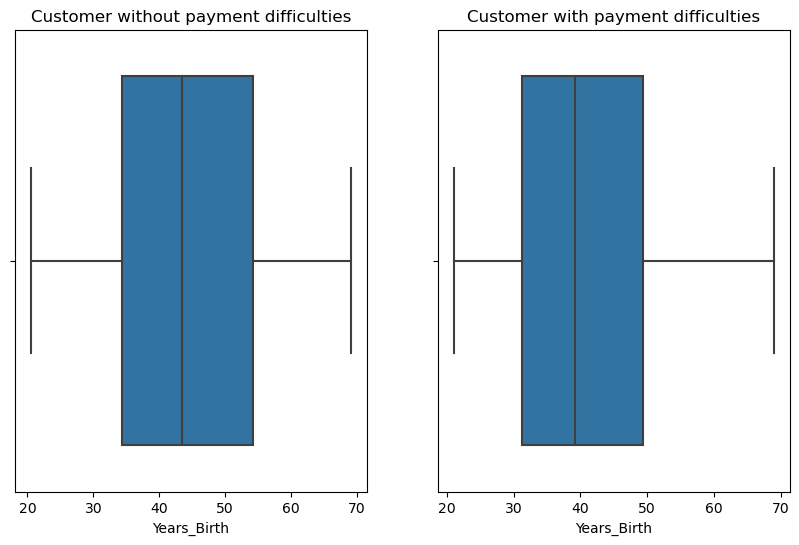

In [65]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0['Years_Birth'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1['Years_Birth'])
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning">
From the above box plot we can note that customer without payment difficulties having year in between 34 to 54 years ,
And coustomer with payment difficulties having in between 31 to 50 years.
</div>

<div class="alert alert-info"> Lets do univariate analysis on variable ''Years_Employed'' </div>


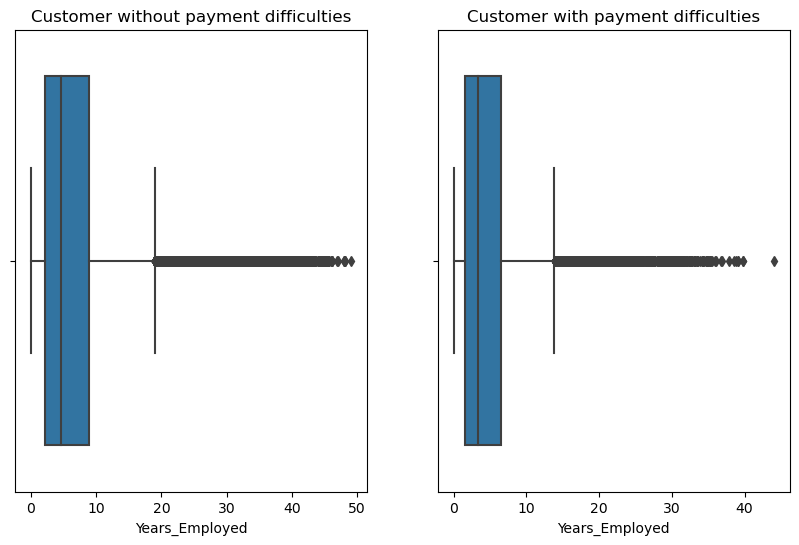

In [66]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Customer without payment difficulties')
sns.boxplot(target_0[target_0['Years_Employed']<1000]['Years_Employed'])
plt.subplot(1,2,2)
plt.title('Customer with payment difficulties')
sns.boxplot(target_1[target_1['Years_Employed']<1000]['Years_Employed'])
plt.show()

<div class="alert alert-warning">

From the above box plot we can note that customer without payment difficulties having year_employed in between 2 to 10 years ,
And coustomer with payment difficulties having in between 2 to 8 years.
    
</div>

<div class="alert alert-info"> Lets do univariate analysis on variable ''AMT_GOODS_PRICE'' </div>


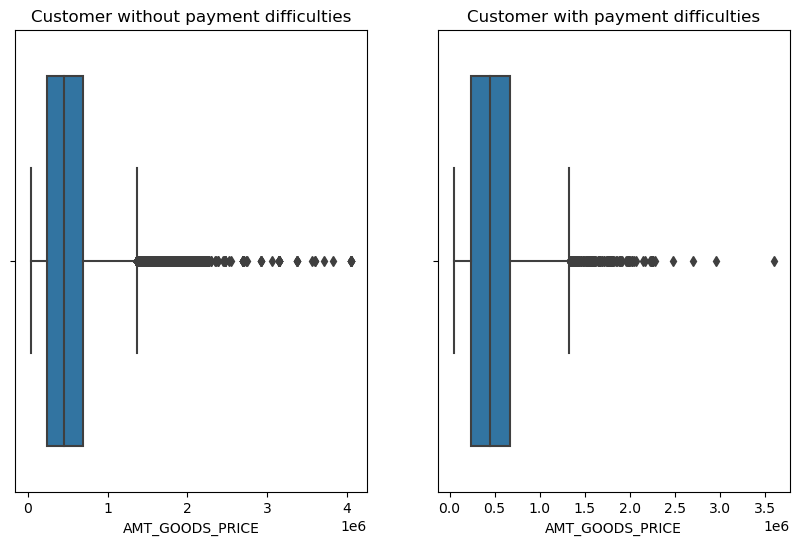

In [67]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0['AMT_GOODS_PRICE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1['AMT_GOODS_PRICE'])
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning">

From the above box plot we can note that customer without payment difficulties having AMT_GOODS_PRICE in between 0.3 to 0.7,
And coustomer with payment difficulties having AMT_GOODS_PRICE in between 0.3 to 0.7.
it has mid value 0.5
    
</div>


<div class="alert alert-info"> Lets do univariate analysis on variable ''YEARS_ID_PUBLISH'' </div>


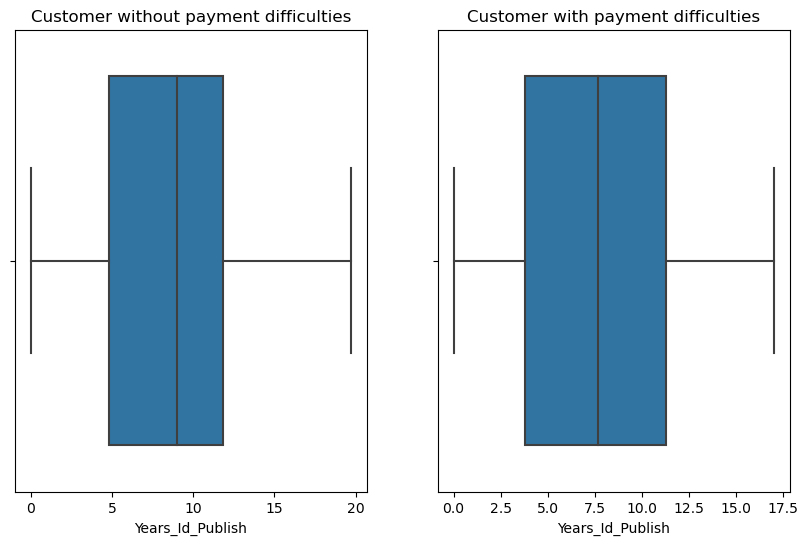

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0['Years_Id_Publish'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1['Years_Id_Publish'])
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning">

From the above box plot we can note that customer without payment difficulties having YEARS_ID_PUBLISH in between 5 to 11,
And coustomer with payment difficulties having AMT_GOODS_PRICE in between 3 to 11 years.
    
</div>

<div class="alert alert-info"> Lets do univariate analysis on variable ''AMT_ANNUITY'' </div>


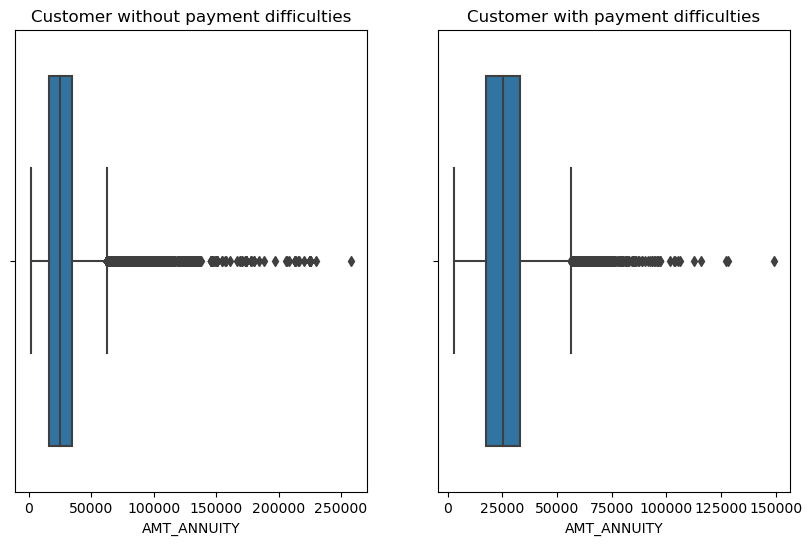

In [69]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0['AMT_ANNUITY'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(target_1['AMT_ANNUITY'])
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning">

From the above box plot we can note that customer without payment difficulties having AMT_ANNUITY in between 20000 to 30000,
And coustomer with payment difficulties having AMT_GOODS_PRICE in between 20000 to 30000 years.
    
</div>

<div class="alert alert-info"> 

Univariate Analysis For Categorical Variables
    
</div>

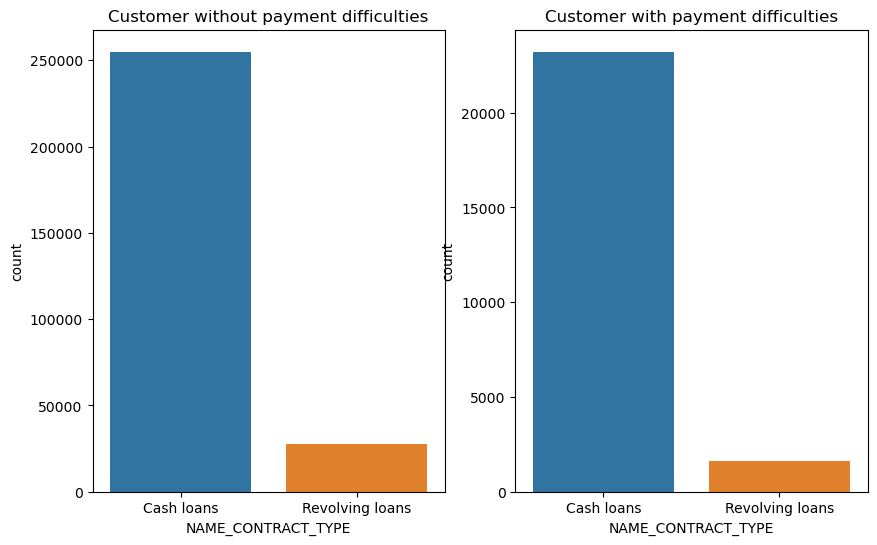

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_CONTRACT_TYPE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning">

Here we can see that customer without payment difficulties and customer with payment difficulties are taking cash loans
    
</div>

<div class="alert alert-info"> Lets do univariate analysis on variable ''CODE_GENDER'' </div>


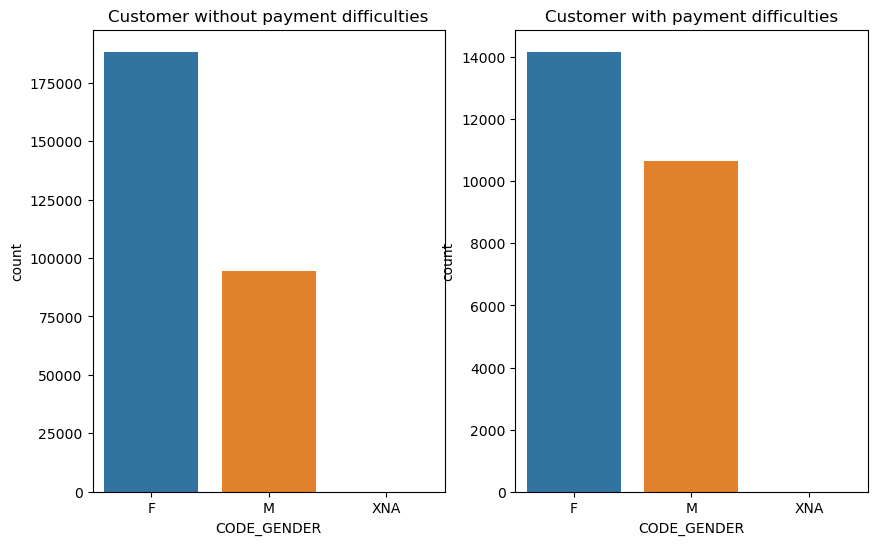

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0['CODE_GENDER'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(target_1['CODE_GENDER'])
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning">
 Here we can see that Females are more in number,in both cases
    </DIV>

<div class="alert alert-info"> Lets do univariate analysis on variable ''NAME_EDUCATION_TYPE'' </div>


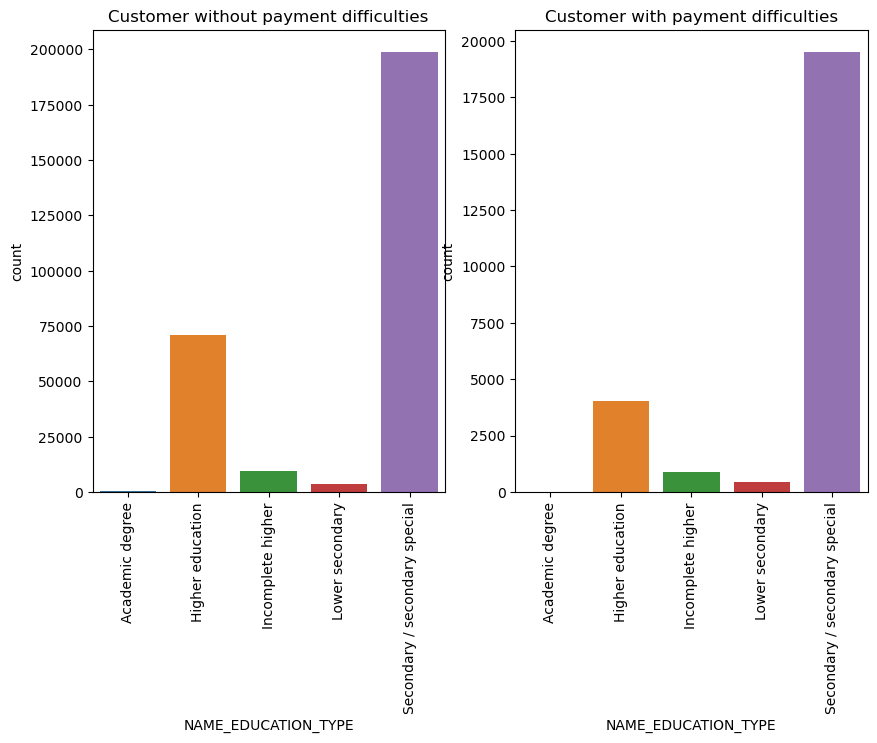

In [72]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_EDUCATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning"> Here , we can see that secondary/secondary special are more in number ,in both cases </DIV>

<div class="alert alert-info"> Lets do univariate analysis on variable ''NAME_HOUSING_TYPE'' </div>


In [73]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)A
sns.countplot(target_0['NAME_HOUSING_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_HOUSING_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

SyntaxError: invalid syntax (319979626.py, line 2)

<div class="alert alert-warning"> 

Here, we can see that House/Apartment category are more in number in both cases
customers take more in number for House/Apartment category in both cases.
    
</div>

<div class="alert alert-info"> Lets do univariate analysis on variable ''OCCUPATION_TYPE'' </div>


In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties')
plt.show()

<div class="alert alert-warning"> Here,we can see labourers are facing more difficulty in paying loans,sales staff and core staff too facing difficulty in paying loans.
labourers are more in number in paying of loans too.
</div>

<div class="alert alert-info">
Bivariate Analysis
</div>

<div class="alert alert-info">

Numerical bivariate analysis on Years_employed and Amt_income_total

</div>    

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0[target_0['Years_Employed']<1000],x='Years_Employed',y='AMT_INCOME_TOTAL')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1[target_1['Years_Employed']<1000],x='Years_Employed',y='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

<div class="alert alert-info"> bivariate analysis on AMT_CREDIT and AMT_GOODS_PRICE </div>

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that, positively correlated(goods price is positivey correlated to credit amount)

<div class="alert alert-info"> Bivariate analysis on amt_credit and amt_annuity

In [ ]:
#bivariate analysis on 'AMT_CREDIT' and 'AMT_ANNUITY'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> we can conclude that, people with out payment difficulties take more credit for the annuity </div> 

<div class="alert alert-info"> bivariate analysis on Name_contract_type and AMT_credit_range </div>

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=target_0,x='NAME_CONTRACT_TYPE',hue='Credit_Range')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target_1,x='NAME_CONTRACT_TYPE',hue='Credit_Range')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-warning"> Here we can see ,most of the people taking cash loans and people without facing payment diffuclties have revovling loans more than other case. </div>

<div class="alert alert-info"> bivariate analysis on code_gender and AMT_credit_range </div>

In [ ]:

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=target_0,x='CODE_GENDER',hue='Credit_Range')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=target_1,x='CODE_GENDER',hue='Credit_Range')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-warning"> Here we can see that, Females are more in number taking loans and females have more amount credit range in both cases.
</div>

<div class="alert alert-info"> bivariate analysis on AMT_CREDIT and NAME_EDUCATION_TYPE </div>

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

<div class="alert alert-warning">
Here we can see that the range of customers with payment difficulties of academic degree is higher than wihtout payment difficulties
rest of education type is similar to each other.
</div>

<div class="alert alert-info"> Bivariate analysis on AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE </div>

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0[target_0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=target_1[target_1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here, we can see that customer without payment difficulties are having more outliers than compared to customer with payment difficulties. </div>

<div class="alert alert-info"> Bivariate analysis on AMT_CREDIT and OCCUPATION_TYPE </div>

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that the range of the customers without payment more as compare to the customers with payment. </div>

<div class="alert alert-info"> Checking the second data set provided </div> 

In [ ]:
pre.head()

In [ ]:
pre.shape

In [ ]:
pre.info()

In [ ]:
pre.describe()

In [ ]:
app.shape

<div class="alert alert-info"> Lets merge the two datasets provided to us into new data set named : all_data </div> 

In [ ]:
all_data = pd.merge(left=app,right=pre,how='inner',on='SK_ID_CURR')

In [ ]:
all_data.shape

In [ ]:
all_data.head()

<div class="alert alert-info"> Lets check percentage of 'Name_contract_status' </div> 

In [ ]:
all_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

<div class="alert alert-warning"> We found approved, canceled, refused and unused offer from above </div> 

<div class="alert alert-info"> Lets plot all status above </div> 

In [ ]:
sns.countplot(all_data['NAME_CONTRACT_STATUS'])
plt.xlabel('Contract_Status')
plt.ylabel('Count of Contract Status')
plt.show()

<div class="alert alert-info"> Dividing the new dataframe into 4parts based on contract status, i.e: Approved, Refused, Cancelled, Unused Offer
 </div> 

In [ ]:
approved = all_data[all_data['NAME_CONTRACT_STATUS']=='Approved']
refused = all_data[all_data['NAME_CONTRACT_STATUS']=='Refused']
canceled=all_data[all_data['NAME_CONTRACT_STATUS']=='Canceled']
unused=all_data[all_data['NAME_CONTRACT_STATUS']=='Unused offer']

<div class="alert alert-info"> Now `check the percentage of each type of contract status </div>


In [ ]:
all_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

<div class="alert alert-info"> Analysis on variable 'Name_contract_type_x'

In [ ]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_CONTRACT_TYPE_x')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CONTRACT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_CONTRACT_TYPE_x')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled,x='NAME_CONTRACT_TYPE_x')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CONTRACT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused,x='NAME_CONTRACT_TYPE_x')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CONTRACT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that the Revolving loan is much more acceptable as compare to the cash and consumer loans

<div class="alert alert-info"> Analysis on variable 'Name_contract_type_x'

In [ ]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_CLIENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CLIENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_CLIENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CLIENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled,x='NAME_CLIENT_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused,x='NAME_CLIENT_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_CLIENT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that the Repeater is getting more Refused.
But also we can see that the it also getting more apporved and even that it is getting more canceled and more usused.

<div class="alert alert-info"> Analysis on variable 'Code_gender'

In [ ]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='CODE_GENDER')
ax1.set_title('Approved')
ax1.set_xlabel('CODE_GENDER')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='CODE_GENDER')
ax2.set_title('refused')
ax2.set_xlabel('CODE_GENDER')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled,x='CODE_GENDER')
ax3.set_title('canceled')
ax3.set_xlabel('CODE_GENDER')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused,x='CODE_GENDER')
ax4.set_title('unused_')
ax4.set_xlabel('CODE_GENDER')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that Female is getting more Refused more approved more canceled more unused.But in case of male it is having average in every category.

<div class="alert alert-info"> Analysis on variable 'Name_education_type'

In [ ]:

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_EDUCATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_EDUCATION_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_EDUCATION_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled,x='NAME_EDUCATION_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_EDUCATION_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused,x='NAME_EDUCATION_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_EDUCATION_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that Secondary/ Secondary special is more effective in every case

<div class="alert alert-info"> Analysis on variable 'Name_income_type'

In [ ]:

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='NAME_INCOME_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_INCOME_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused,x='NAME_INCOME_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_INCOME_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled,x='NAME_INCOME_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_INCOME_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused,x='NAME_INCOME_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_INCOME_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

<div class="alert alert-warning"> Here we can see that the working type people are applying more loans as compare to others.
And also Commercial associates people are taking more loans.

<div class="alert alert-info"> 
    
We will put the above code in a function and generalize it for our following plots, 
So that its easy to visualize and saves time.
    
    

In [ ]:


def diff_plots(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(20,6), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved,x=variable_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused,x=variable_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    plt.tight_layout()
    plt.show()

<div class="alert alert-info">  Plot on 'new_family_status'

In [ ]:
diff_plots('NAME_FAMILY_STATUS')

<div class="alert alert-warning">  Here we can see that the Married people are applying and taking loans more than the others.

<div class="alert alert-info"> Plot on 'Name_payment_type'

In [ ]:
diff_plots('NAME_PAYMENT_TYPE')

<div class="alert alert-warning">  Here we can see that the people are taking more loan in format of cash through the bank.

<div class="alert alert-info"> Plot on 'Name_portfolio'

In [ ]:
diff_plots('NAME_PORTFOLIO')

<div class="alert alert-warning"> Here most approved loan were through Cash and Most refused loans were in POS

<div class="alert alert-info"> Plot on 'occupation_type'

In [ ]:
diff_plots('OCCUPATION_TYPE')

<div class="alert alert-warning"> 
Here laborers are getting most refused and most approved loans. 
And aslo Sales staff is also getting the second most refused and approved loans.

<div class="alert alert-info"> Plot on 'Name_goods_category'

In [ ]:
diff_plots('NAME_GOODS_CATEGORY')

<div class="alert alert-warning">  Here Most Refused loan is of Mobile and most approved loan is Mobile.

<div class="alert alert-info"> Plot on 'product_combination'

In [ ]:

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,8),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved,x='PRODUCT_COMBINATION')
ax1.set_title('Approved')
ax1.set_xlabel('PRODUCT_COMBINATION')
ax1.set_ylabel('Number of Loans')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2=sns.countplot(ax=ax2,data=refused,x='PRODUCT_COMBINATION')
ax2.set_title('refused')
ax2.set_xlabel('PRODUCT_COMBINATION')
ax2.set_ylabel('Number of Loans')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax3=sns.countplot(ax=ax3,data=canceled,x='PRODUCT_COMBINATION')
ax3.set_title('canceled')
ax3.set_xlabel('PRODUCT_COMBINATION')
ax3.set_ylabel('Number of Loans')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax4=sns.countplot(ax=ax4,data=unused,x='PRODUCT_COMBINATION')
ax4.set_title('unused_')
ax4.set_xlabel('PRODUCT_COMBINATION')
ax4.set_ylabel('Number of Loans')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()

<div class="alert alert-warning"> The most accepting loan is Cash X-sell:low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.

<div class="alert alert-danger">
<font size="+1">  
    
Conclusion:

&#10148; The results of the credit analysis indicate that a higher number of loan defaults are observed among clients with income type "Working". </br>

&#10148; Additionally, loans taken for the purpose of "Repair" have a higher number of defaults compared to other loan purposes.</br> 

&#10148; On the other hand, clients with housing type "With Parents" have the lowest number of defaults.</br> 

&#10148; In terms of gender, a higher number of loan applications are received from female clients. </br>

&#10148; Based on these findings, banks may want to focus on loan applicants who are "Students" or "Pensioners", as they have a higher likelihood of successful repayments.</br>


</font>
</div>